# Image Classification of World Famous Leaders

**The dataset was created by downloading the World famous leaders images using the Fatkun chrome extension. The dataset consists of images of 11 famous leaders. Around 30 images were downloaded for each of the leaders. Each image is in 'jpg' format.**

### Importing required libraries

In [20]:
import numpy as np
import cv2
import pywt  

import os
import shutil

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the image using the opencv library

In [21]:
img = cv2.imread('C:/Data Science/Image Identification/model/test_images/Pope1.jpg')
img.shape

(507, 760, 3)

**The above output shows the shape as three dimension. The first two dimensions are x and y coordinates and the third dimension is a rgb values.**

# Preprocessing

### **Displaying the image as a rgb value image.**

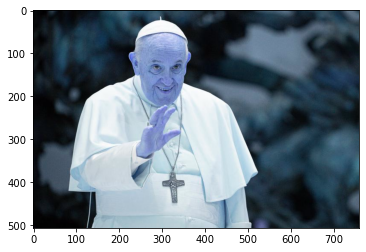

In [22]:
plt.imshow(img)

**Changing the image into a gray image.**

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(507, 760)

**The shape of the gray image is in two dimension as there is no rgb values.**

### **Displaying the colourful image as a gray image.**

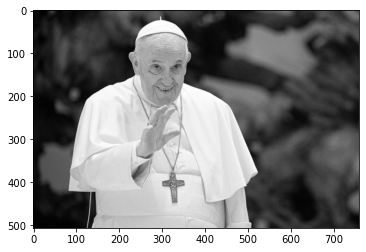

In [24]:
plt.imshow(gray, cmap = 'gray')

**Next step is to detect the face and eyes in the image. Face detection is done by using the Haar Cascades features.**

**Loading the xml file of face cascade and eye cascade features.**

In [25]:
face_cascade = cv2.CascadeClassifier('C:/Data Science/Image Identification/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Data Science/Image Identification/model/opencv/haarcascades/haarcascade_eye.xml')

In [26]:
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
faces

array([[248,  88, 123, 123]])

**This outputs an array with four values. The first two values are x and y. The third one is the width and the fourth value ie is the height of the face.**

**Storing the four values in x, y, w, h.**

In [27]:
(x,y,w,h) = faces[0]
x,y,w,h

(248, 88, 123, 123)

### **Drawing a rectangle in red to detect the face in the image.**

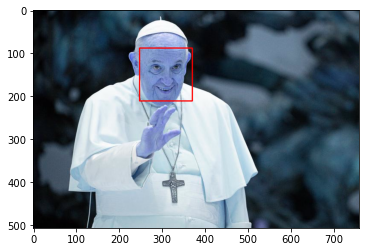

In [28]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)


### **Detecting eyes in the image**

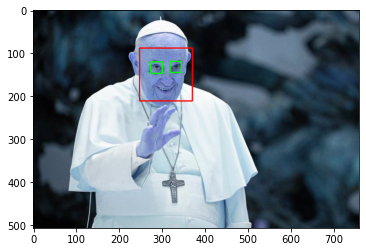

In [29]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

**The cropped image is shown below.**

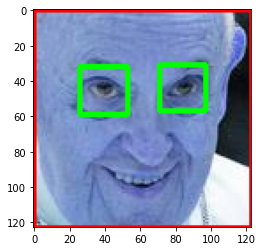

In [30]:
plt.imshow(roi_color, cmap = 'gray')

In [31]:
cropped_img = np.array(roi_color)
cropped_img.shape

(123, 123, 3)

**In the preprocessing image, cleaning the images that has multiple faces or not clear or obstructed images. Once the face is detected,it will detect eyes, if two eyes are detected then that image will be saved and the images will be discarded.**

**This is done by using the 'get_cropped_image_if_2_eyes()' function.**

In [32]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color   

**A cropped folder is created to store all the cropped images.**

In [33]:
path_to_data = "C:/Data Science/Image Identification/model/dataset"
path_to_cropped_data = "C:/Data Science/Image Identification/model/dataset/cropped"

In [34]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [35]:
img_dirs

['C:/Data Science/Image Identification/model/dataset\\barack obama',
 'C:/Data Science/Image Identification/model/dataset\\david cameron',
 'C:/Data Science/Image Identification/model/dataset\\dilma rousseff',
 'C:/Data Science/Image Identification/model/dataset\\francosis hollande',
 'C:/Data Science/Image Identification/model/dataset\\narendra modi',
 'C:/Data Science/Image Identification/model/dataset\\park geun-hye',
 'C:/Data Science/Image Identification/model/dataset\\pope francis',
 'C:/Data Science/Image Identification/model/dataset\\trump',
 'C:/Data Science/Image Identification/model/dataset\\valdimer putin',
 'C:/Data Science/Image Identification/model/dataset\\xi jinping']

In [36]:
for img_dir in img_dirs:
    leader_name = img_dir.split('\\')[-1]
    print(leader_name)
    

barack obama
david cameron
dilma rousseff
francosis hollande
narendra modi
park geun-hye
pope francis
trump
valdimer putin
xi jinping


In [37]:
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)    

In [38]:
cropped_image_dirs = []
leaders_filenames_dict = {}

for img_dir in img_dirs:
    count = 1
    leader_name = img_dir.split('\\')[-1]
    print(leader_name)
    
    leaders_filenames_dict[leader_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + '/' + leader_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = leader_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            leaders_filenames_dict[leader_name].append(cropped_file_path)
            count += 1

barack obama
Generating cropped images in folder:  C:/Data Science/Image Identification/model/dataset/cropped/barack obama
david cameron
Generating cropped images in folder:  C:/Data Science/Image Identification/model/dataset/cropped/david cameron
dilma rousseff
Generating cropped images in folder:  C:/Data Science/Image Identification/model/dataset/cropped/dilma rousseff
francosis hollande
Generating cropped images in folder:  C:/Data Science/Image Identification/model/dataset/cropped/francosis hollande
narendra modi
Generating cropped images in folder:  C:/Data Science/Image Identification/model/dataset/cropped/narendra modi
park geun-hye
Generating cropped images in folder:  C:/Data Science/Image Identification/model/dataset/cropped/park geun-hye
pope francis
Generating cropped images in folder:  C:/Data Science/Image Identification/model/dataset/cropped/pope francis
trump
Generating cropped images in folder:  C:/Data Science/Image Identification/model/dataset/cropped/trump
valdimer

**'leaders_filenames_dict' has the dictionary with leaders names as key and the values are the cropped images of leaders image.**

In [39]:
leaders_filenames_dict

{'barack obama': ['C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama1.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama2.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama3.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama4.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama5.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama6.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama7.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama8.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama9.png',
  'C:/Data Science/Image Identification/model/dataset/cropped/barack obama/barack obama10.png',
  'C:/Data Science/Image Identifi

# Feature Extraction

Using **Wavelet transform** the facial features from the images are extracted. 

In [513]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H    

**Below cell shows the extracted wavelet transform image.**

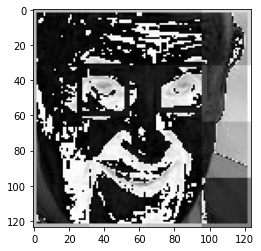

In [514]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap = 'gray')

**Creating a class dictionary and assigning number to each leaders names.** 

In [515]:
class_dict = {}
count = 0
for leaders_name in leaders_filenames_dict.keys():
    class_dict[leaders_name] = count
    count = count + 1
class_dict

{'barack obama': 0,
 'david cameron': 1,
 'dilma rousseff': 2,
 'francosis hollande': 3,
 'narendra modi': 4,
 'park geun-hye': 5,
 'pope francis': 6,
 'trump': 7,
 'valdimer putin': 8,
 'xi jinping': 9}

**Now extracting the Wavelet transform for all the cropped images and creating X and y. Where X will have all the raw images and the transformed wavelet images stacked vertically. And, y will have the numbers that are assigned to the Leaders names.** 

In [ ]:
X, y = [], []
for leaders_name, training_files in leaders_filenames_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        # resizing the raw image as all the images will be having different sizes.
        scalled_raw_img = cv2.resize(img, (32, 32)) 
        img_har = w2d(img,'db1',5)
        # resizing the wavelet transformed images.
        scalled_img_har = cv2.resize(img_har, (32, 32))
        #Vertically stacking the raw images and the wavelet transformed images.
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[leaders_name])

The size of each image is 4096

In [517]:
len(X[0])

4096

In [518]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(111, 4096)

# Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Model Training

**Creating a Pipeline function that first scales the data using StandardScalar. Next, the data will be trained using SVM model with different parameters.**

In [519]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7142857142857143

In [520]:
from sklearn.svm import SVC
classifier_model  = svm.SVC(C=1,kernel='poly')
classifier_model.fit(X_train,y_train)

classifier_model.score(X_test, y_test)

0.6428571428571429

In [521]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.50      0.50      0.50         2
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.60      1.00      0.75         6
           9       1.00      0.50      0.67         2

    accuracy                           0.71        28
   macro avg       0.61      0.53      0.55        28
weighted avg       0.77      0.71      0.71        28



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Fine tuning 

**Using GridSearch different candidate models were trained with different parameters to find the best fine tuned parameters.**

The candidate models were,

1. SVM
2. Random forest
3. logistic regression

In [522]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [523]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.719118,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.554412,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.805147,{'logisticregression__C': 1}


In [524]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [525]:
best_estimators['svm'].score(X_test,y_test)

0.7142857142857143

In [526]:
best_estimators['random_forest'].score(X_test,y_test)

0.6428571428571429

In [527]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [529]:
best_clf = best_estimators['logistic_regression']

In [530]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

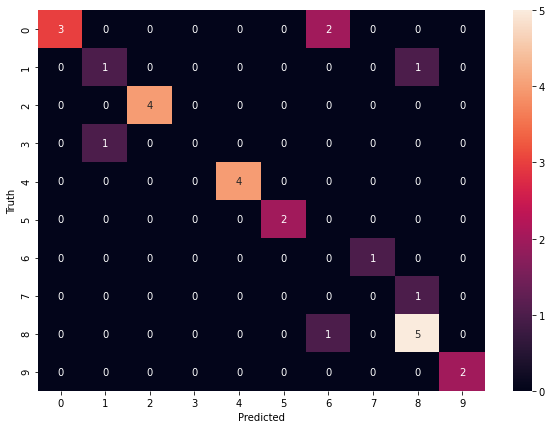

In [531]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Saving the best model**

In [532]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

**Saving the class dictionary**

In [533]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))